# Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette = 'twilight_r') #setting the theme for the plots

### Step 1: Reading the data from the URL

In [2]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

print("Data is imported.")

Data is imported.


### Step 2: Exploring the Data

In [3]:
data.shape 

(25, 2)

This means that our data has 25 rows and 2 columns.

In [4]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


The above method retrieves the first 5 records from our dataset.

To see statistical details of the data, we can use describe().

In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Plotting the data to manually find any relationship between the data.

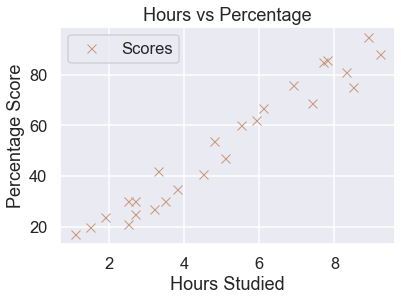

In [6]:
data.plot(x = 'Hours', y = 'Scores', style='x')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

From the graph above we can see that as the number of hours studied increases the percentage of scores also increases this means that a positive linear relationship exists between Hours and Scores.

### Step 3: Preparing the Data

Dividing the data into Attributes(Independant variables) and Labels(Dependant Variables).

In [7]:
X = data.iloc[:, :-1].values #to include all the columns except the last one(Scores)
y = data.iloc[:, 1].values #index for scores column is 1.

Splitting the data into train and test sets by using Scikit-Learn's built-in train_test_split() method.

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Splitting 80% of the data to training set while 20% of the data to test set. The test_size variable is where we actually specify the proportion of test set.

### Step 4: Training the Algortithm

In [9]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print("Training complete.")

Training complete.


In [10]:
print(regressor.intercept_)#To retrieve the intercept

2.018160041434683


In [11]:
print(regressor.coef_)#For retrieving the slope (coefficient of x)

[9.91065648]


This means that if a student studies one hour more than they previously studied for an exam, they can expect to achieve an increase of 9.91% in the score achieved by the student previously.

#### Plotting the regression line

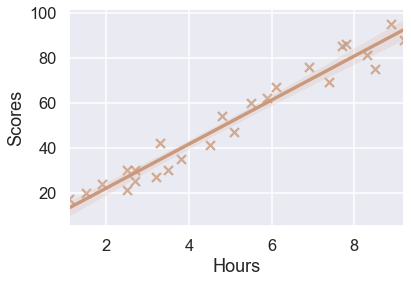

In [12]:
fig = plt.subplots()
sns.regplot(x= "Hours", y= "Scores", data = data, marker = "x")
plt.show()

 The points in the plot above follow the line closely, suggesting that the relationship between the variables is strong and also affirming our previous observation of positive linear relationship between hours and scores.

### Step 5: Making Predictions

In [13]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


#### Comparing Actual vs Predicted

In [14]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [15]:
hours = [[9.25]]
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538


### Step 6: Evaluating the Algorithm

For evaluating a regression algorithm these three evaluation metrics are commonly used:
    $$Mean Absolute Error (MAE) = (\frac{1}{n})\sum_{i=1}^{n}\left | Actual - Predicted \right |$$
    $$Mean Squared Error (MSE) = (\frac{1}{n})\sum_{i=1}^{n}(Actual - Predicted)^{2}$$
    $$Root Mean Squared Error (RMSE) = \sqrt{(\frac{1}{n})\sum_{i=1}^{n}(Actual - Predicted)^{2}}$$

In [16]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665


The value of root mean squared error is 4.64, which is less than 10% of the mean value of the percentages of all the students i.e. 51.48.Hence, our model did a decent job.